## Figure preparation for VOR/OKR data

### Loading packages

In [1]:
library(tidyverse) #for data manipulation and visualization
library(ggpubr) #for creating easily publication ready plots
library(reshape)
library(ggplot2)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.3.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.2"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.2"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggpubr' was built under R version 3.4.2"Loading requi

### Import VOG data from VOG data Retriever

In [2]:
VOG.data <- read.delim(file="C:/Users/KimYG/Documents/GitHub/Jupyter_notebook/SSFO_G01_OKR Learning score_wo_light.txt", sep = '\t', stringsAsFactors = F, header=T)
#read.delim("clipboard", sep = '\t', stringsAsFactors = F, header = T)
VOG.data

G01_293_OL,G01_901_OL,G01_903_OL,G01_292_OL,G01_902_OL,Mean,S.D,S.E.M
0.152,0.187,0.505,0.301,0.261,0.281,0.138,0.062
0.292,0.271,0.625,0.374,0.396,0.392,0.141,0.063
0.488,0.415,0.651,0.545,0.619,0.544,0.096,0.043
0.463,0.433,0.692,0.617,0.687,0.578,0.123,0.055
0.348,0.478,0.681,0.479,0.634,0.524,0.134,0.06
-----,-----,-----,-----,-----,-----,-----,-----
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove the separators in dataframe

In [3]:
VOG.data2 <- VOG.data[-c(6,12,18,24,30,36),]
dim(VOG.data2)

[1] 30  8

### Add type (Gain or Phase), protocol (OKR or dVOR or lVOR), stimulu condition (frequency)

In [4]:
type <- rep(c("Gain", "Phase"), each=(dim(VOG.data2)[1])/2)
protocol <- rep(rep(c("OKR", "dVOR", "lVOR"), each=5),2)
condition <- rep(c("0 min", "15 min", "30 min","45 min","24 hr"), 6) #rep(c("0.1Hz", "0.25Hz", "0.5Hz","1.0Hz"), 6)

VOG.data2 <- cbind(type, protocol, condition, VOG.data2)
head(VOG.data2)

,type,protocol,condition,G01_293_OL,G01_901_OL,G01_903_OL,G01_292_OL,G01_902_OL,Mean,S.D,S.E.M
1,Gain,OKR,0 min,0.152,0.187,0.505,0.301,0.261,0.281,0.138,0.062
2,Gain,OKR,15 min,0.292,0.271,0.625,0.374,0.396,0.392,0.141,0.063
3,Gain,OKR,30 min,0.488,0.415,0.651,0.545,0.619,0.544,0.096,0.043
4,Gain,OKR,45 min,0.463,0.433,0.692,0.617,0.687,0.578,0.123,0.055
5,Gain,OKR,24 hr,0.348,0.478,0.681,0.479,0.634,0.524,0.134,0.06
7,Gain,dVOR,0 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows containing unmeasured protocol(s) 

In [5]:
VOG.data3 <- filter(VOG.data2, G01_292_OL!="NaN")
VOG.data3

type,protocol,condition,G01_293_OL,G01_901_OL,G01_903_OL,G01_292_OL,G01_902_OL,Mean,S.D,S.E.M
Gain,OKR,0 min,0.152,0.187,0.505,0.301,0.261,0.281,0.138,0.062
Gain,OKR,15 min,0.292,0.271,0.625,0.374,0.396,0.392,0.141,0.063
Gain,OKR,30 min,0.488,0.415,0.651,0.545,0.619,0.544,0.096,0.043
Gain,OKR,45 min,0.463,0.433,0.692,0.617,0.687,0.578,0.123,0.055
Gain,OKR,24 hr,0.348,0.478,0.681,0.479,0.634,0.524,0.134,0.06
Phase,OKR,0 min,-20.497,-15.343,-19.683,-9.417,-16.697,-16.327,4.402,1.969
Phase,OKR,15 min,-6.207,-2.99,-7.907,2.3,-5.327,-4.026,3.956,1.769
Phase,OKR,30 min,-7.92,-1.653,-8.813,-2.62,-5.547,-5.311,3.152,1.41
Phase,OKR,45 min,-4.34,1.683,-5.527,-6.367,-6.373,-4.185,3.384,1.513
Phase,OKR,24 hr,-2.757,-2.67,-8.51,-5.29,-8.297,-5.505,2.849,1.274


### Drop columns containing discriptive statistics

In [6]:
VOG.data3 <- VOG.data3[,1:(dim(VOG.data3)[2]-3)]

### Covert from wide-format to long-format 

In [7]:
long.format.VOG.data <- melt(VOG.data3, id.vars = c("type","protocol","condition"))
long.format.VOG.data <- long.format.VOG.data %>% select(variable, type, protocol, condition, value) 
colnames(long.format.VOG.data)  <- c("id", "type", "protocol","condition", "value")
long.format.VOG.data$value <- as.numeric(as.character(long.format.VOG.data$value))
head(long.format.VOG.data)

id,type,protocol,condition,value
G01_293_OL,Gain,OKR,0 min,0.152
G01_293_OL,Gain,OKR,15 min,0.292
G01_293_OL,Gain,OKR,30 min,0.488
G01_293_OL,Gain,OKR,45 min,0.463
G01_293_OL,Gain,OKR,24 hr,0.348
G01_293_OL,Phase,OKR,0 min,-20.497


### Prepare Gain and Phase tables

In [8]:
Gain.table <- long.format.VOG.data %>% filter(type=="Gain")
str(Gain.table)
Phase.table <- long.format.VOG.data  %>% filter(type=="Phase")
str(Phase.table)

'data.frame':	25 obs. of  5 variables:
 $ id       : Factor w/ 5 levels "G01_293_OL","G01_901_OL",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ type     : Factor w/ 2 levels "Gain","Phase": 1 1 1 1 1 1 1 1 1 1 ...
 $ protocol : Factor w/ 3 levels "dVOR","lVOR",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ condition: Factor w/ 5 levels "0 min","15 min",..: 1 2 4 5 3 1 2 4 5 3 ...
 $ value    : num  0.152 0.292 0.488 0.463 0.348 0.187 0.271 0.415 0.433 0.478 ...
'data.frame':	25 obs. of  5 variables:
 $ id       : Factor w/ 5 levels "G01_293_OL","G01_901_OL",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ type     : Factor w/ 2 levels "Gain","Phase": 2 2 2 2 2 2 2 2 2 2 ...
 $ protocol : Factor w/ 3 levels "dVOR","lVOR",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ condition: Factor w/ 5 levels "0 min","15 min",..: 1 2 4 5 3 1 2 4 5 3 ...
 $ value    : num  -20.5 -6.21 -7.92 -4.34 -2.76 ...


### Result Figures

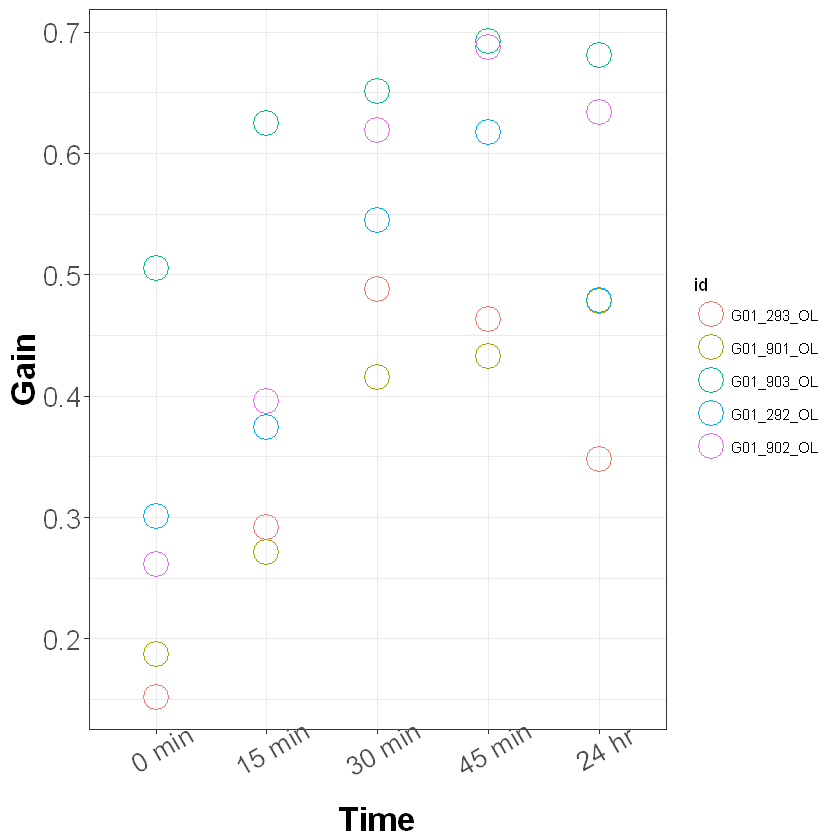

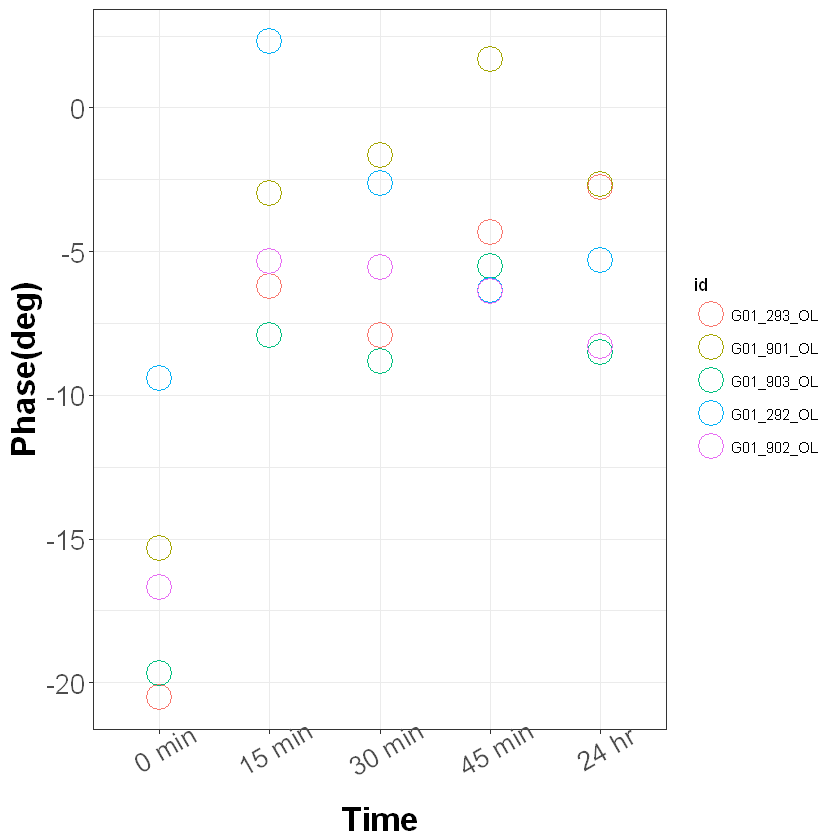

In [9]:
g <- ggplot(Gain.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Gain") + xlab("Time")
g <- g + geom_point(shape=1, size=7)
g <- g + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16)) 
g + scale_x_discrete(limits=c("0 min","15 min", "30 min", "45 min", "24 hr")) #Change order of x axis manually
p <- ggplot(Phase.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Phase(deg)") + xlab("Time")
p <- p + geom_point(shape=1, size=7)
p <- p + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16))
p + scale_x_discrete(limits=c("0 min","15 min", "30 min", "45 min", "24 hr"))

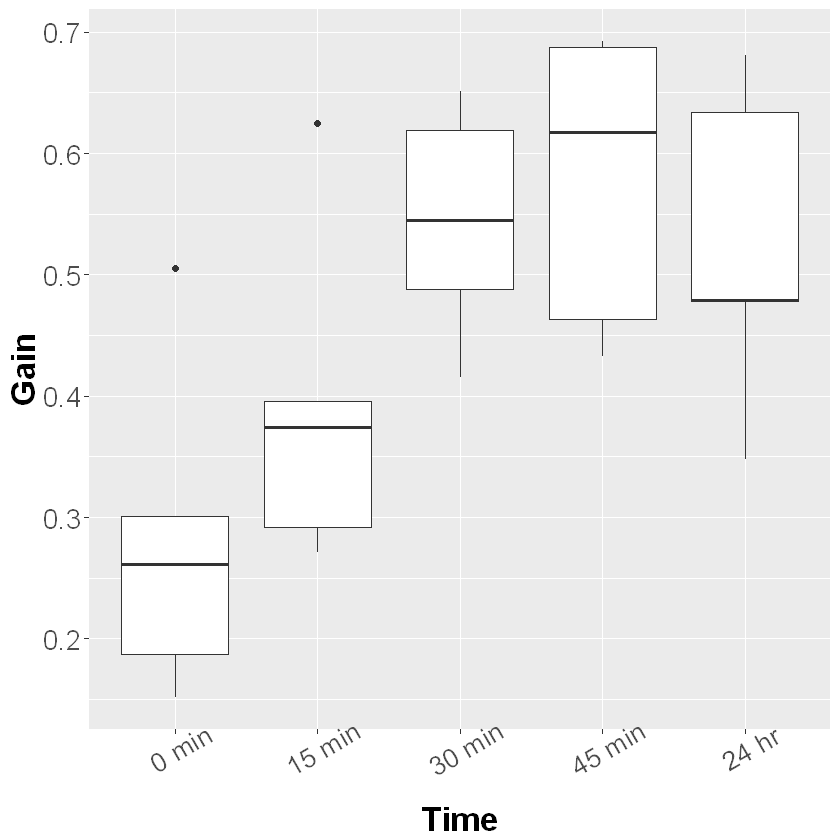

In [10]:
g1 <- ggplot(Gain.table, aes(x=condition, y=value)) + geom_boxplot() + ylab("Gain") + xlab("Time")
g1 + scale_x_discrete(limits=c("0 min", "15 min", "30 min", "45 min", "24 hr")) + 
        theme(axis.title.x=element_text(face="bold",size=20),
              axis.text.x=element_text(angle=30,size=16),
              axis.title.y=element_text(face="bold",size=20),
              axis.text.y=element_text(size=16))

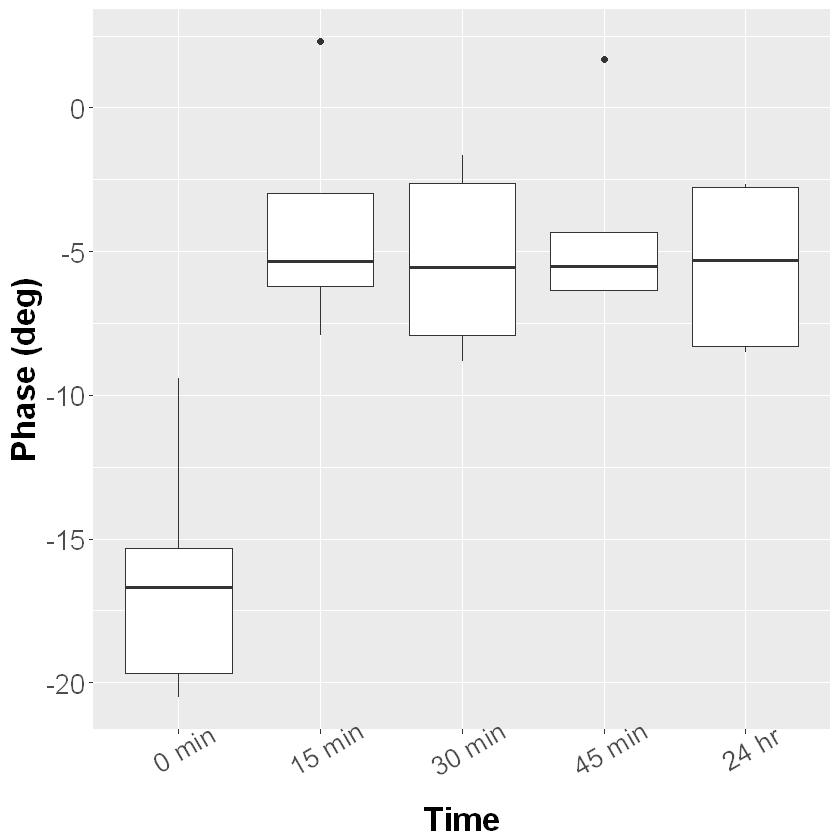

In [11]:
p1 <- ggplot(Phase.table, aes(x=condition, y=value)) + geom_boxplot() + ylab("Phase (deg)") + xlab("Time")
p1 + scale_x_discrete(limits=c("0 min", "15 min", "30 min", "45 min", "24 hr")) + 
        theme(axis.title.x=element_text(face="bold",size=20),
              axis.text.x=element_text(angle=30,size=16),
              axis.title.y=element_text(face="bold",size=20),
              axis.text.y=element_text(size=16))

### Hypothesis Testing using Linear Mixed Model

In [12]:
library(lme4)
library(nlme)
library(multcomp)

Warning message:
"package 'lme4' was built under R version 3.4.4"Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:reshape':

    expand

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList

The following object is masked from 'package:dplyr':

    collapse

Warning message:
"package 'multcomp' was built under R version 3.4.2"Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Warning message:
"package 'TH.data' was built under R version 3.4.2"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [13]:
LMM.Gain <- lme(value ~ condition, random=~1|id, data=Gain.table, na.action="na.omit")
LMM.Phase <- lme(value ~ condition, random=~1|id, data=Phase.table, na.action="na.omit")

av.Gain <- anova(LMM.Gain)
av.Phase <- anova(LMM.Phase)

av.Gain
av.Phase

,numDF,denDF,F-value,p-value
(Intercept),1,16,77.22457,1.606294e-07
condition,4,16,26.48233,6.989946e-07


,numDF,denDF,F-value,p-value
(Intercept),1,16,34.85222,2.223867e-05
condition,4,16,18.98147,6.407711e-06


In [14]:
comp.condition <- glht(LMM.Gain, linfct=mcp(condition="Tukey"))

summary(comp.condition)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = value ~ condition, data = Gain.table, random = ~1 | 
    id, na.action = "na.omit")

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
15 min - 0 min == 0   0.11040    0.03413   3.235  0.01063 *  
24 hr - 0 min == 0    0.24280    0.03413   7.115  < 0.001 ***
30 min - 0 min == 0   0.26240    0.03413   7.689  < 0.001 ***
45 min - 0 min == 0   0.29720    0.03413   8.709  < 0.001 ***
24 hr - 15 min == 0   0.13240    0.03413   3.880  0.00101 ** 
30 min - 15 min == 0  0.15200    0.03413   4.454  < 0.001 ***
45 min - 15 min == 0  0.18680    0.03413   5.474  < 0.001 ***
30 min - 24 hr == 0   0.01960    0.03413   0.574  0.97882    
45 min - 24 hr == 0   0.05440    0.03413   1.594  0.50115    
45 min - 30 min == 0  0.03480    0.03413   1.020  0.84638    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values r

In [15]:
comp.condition2 <- glht(LMM.Phase, linfct=mcp(condition="Tukey"))

summary(comp.condition2)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = value ~ condition, data = Phase.table, random = ~1 | 
    id, na.action = "na.omit")

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
15 min - 0 min == 0   12.3012     1.6932   7.265   <1e-04 ***
24 hr - 0 min == 0    10.8226     1.6932   6.392   <1e-04 ***
30 min - 0 min == 0   11.0168     1.6932   6.507   <1e-04 ***
45 min - 0 min == 0   12.1426     1.6932   7.171   <1e-04 ***
24 hr - 15 min == 0   -1.4786     1.6932  -0.873    0.907    
30 min - 15 min == 0  -1.2844     1.6932  -0.759    0.942    
45 min - 15 min == 0  -0.1586     1.6932  -0.094    1.000    
30 min - 24 hr == 0    0.1942     1.6932   0.115    1.000    
45 min - 24 hr == 0    1.3200     1.6932   0.780    0.937    
45 min - 30 min == 0   1.1258     1.6932   0.665    0.964    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values 